In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Date and time handling
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model saving
import joblib

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/earthquake_data.csv', parse_dates=['date'])
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/earthquake_data.csv'

In [5]:
df = pd.read_csv('data/earthquake_data.csv', parse_dates=['date'])
df.head()


time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  1990-01-01 00:22:33.990000+00:00  
1   6.585  1990-01-01 00:24:51.210000+00:00  
2   3.220  1990-01-01 00:34:43.450000+00:00  
3  -0.584  1990-01-01 00:58:32.130000+00:00  
4  16.122  1990-01-01 01:03:44.490000+00:00

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [7]:
print(df.isnull().sum())


time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64


In [12]:
print(df.describe())


               time       tsunami  significance     magnitudo     longitude  \
count  3.445751e+06  3.445751e+06  3.445751e+06  3.445751e+06  3.445751e+06   
mean   1.247124e+12  4.434447e-04  7.400973e+01  1.774076e+00 -1.012876e+02   
std    2.976292e+11  2.105346e-02  1.016364e+02  1.291055e+00  7.697416e+01   
min    6.311534e+11  0.000000e+00  0.000000e+00 -9.990000e+00 -1.799997e+02   
25%    1.024401e+12  0.000000e+00  1.300000e+01  9.100000e-01 -1.464274e+02   
50%    1.282338e+12  0.000000e+00  3.300000e+01  1.460000e+00 -1.189538e+02   
75%    1.508701e+12  0.000000e+00  8.100000e+01  2.300000e+00 -1.159277e+02   
max    1.690629e+12  1.000000e+00  2.910000e+03  9.100000e+00  1.800000e+02   

           latitude         depth          year         month           day  \
count  3.445751e+06  3.445751e+06  3.445751e+06  3.445751e+06  3.445751e+06   
mean   3.746483e+01  2.285387e+01  2.009023e+03  6.492898e+00  1.532639e+01   
std    2.041577e+01  5.484938e+01  9.437871e+00  3.

In [13]:
# अगर आपने पहले से नहीं किया है:
df['date'] = pd.to_datetime(df['date'])  # ये जरूरी है, ताकि हम उससे features निकाल सकें

# नए features बनाना:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour


In [14]:
df[['date', 'year', 'month', 'day', 'weekday', 'hour']].head()


date  year  month  day weekday  hour
0 1990-01-01 00:22:33.990000+00:00  1990      1    1  Monday     0
1 1990-01-01 00:24:51.210000+00:00  1990      1    1  Monday     0
2 1990-01-01 00:34:43.450000+00:00  1990      1    1  Monday     0
3 1990-01-01 00:58:32.130000+00:00  1990      1    1  Monday     0
4 1990-01-01 01:03:44.490000+00:00  1990      1    1  Monday     1

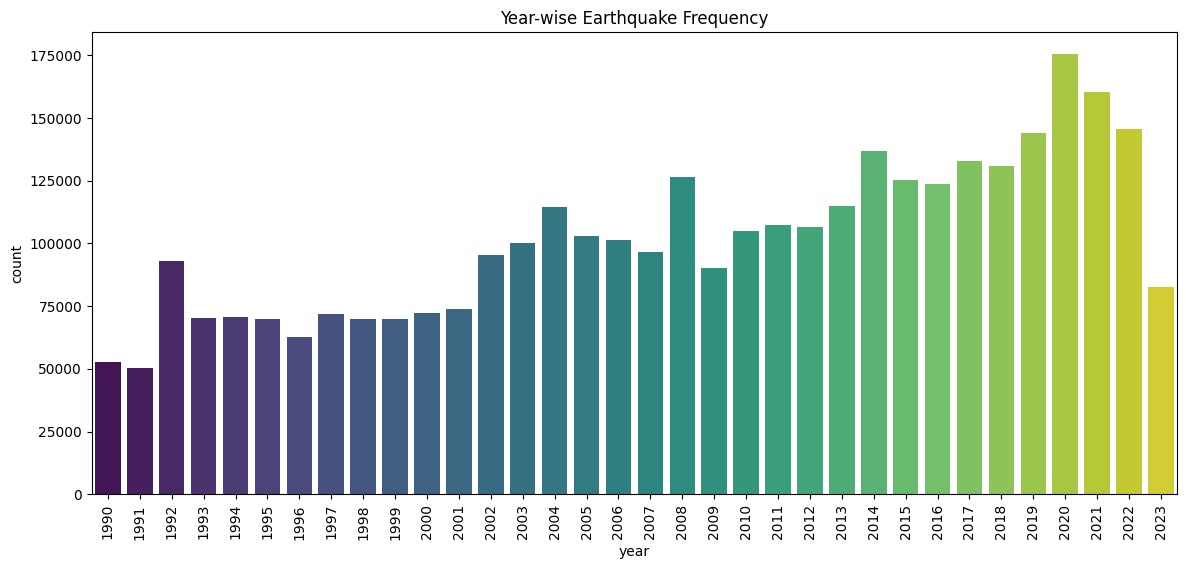

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='year', palette='viridis', order=sorted(df['year'].unique()))
plt.xticks(rotation=90)
plt.title('Year-wise Earthquake Frequency')
plt.show()


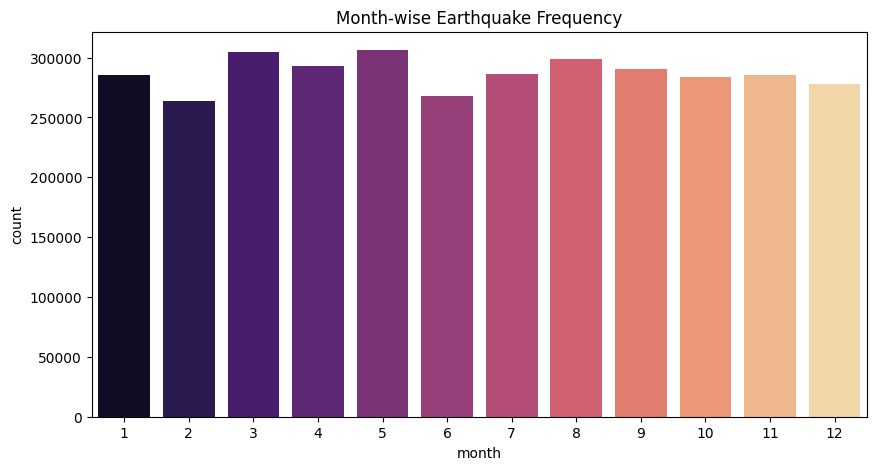

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month', palette='magma')
plt.title('Month-wise Earthquake Frequency')
plt.show()


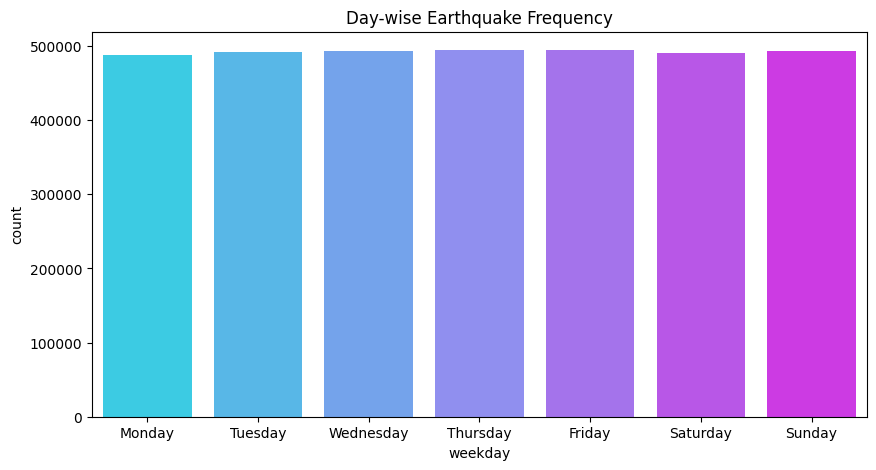

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='cool')
plt.title('Day-wise Earthquake Frequency')
plt.show()


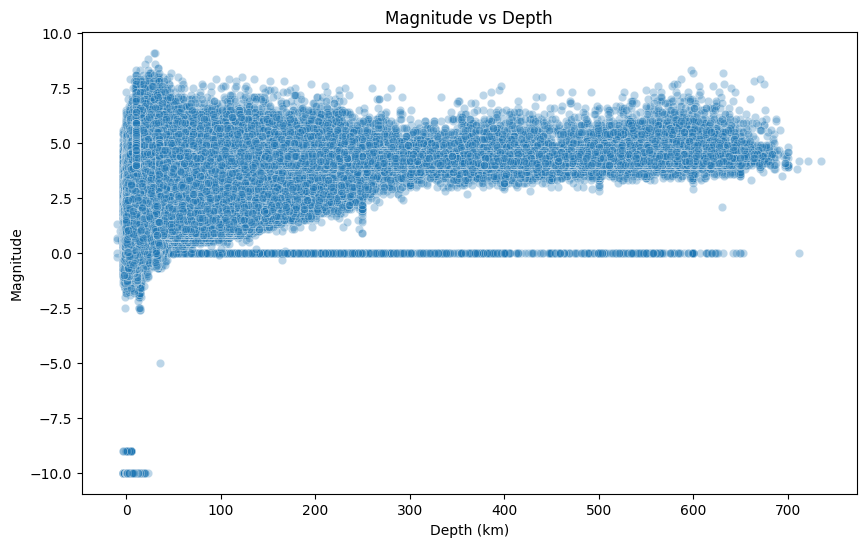

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='depth', y='magnitudo', alpha=0.3)
plt.title('Magnitude vs Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


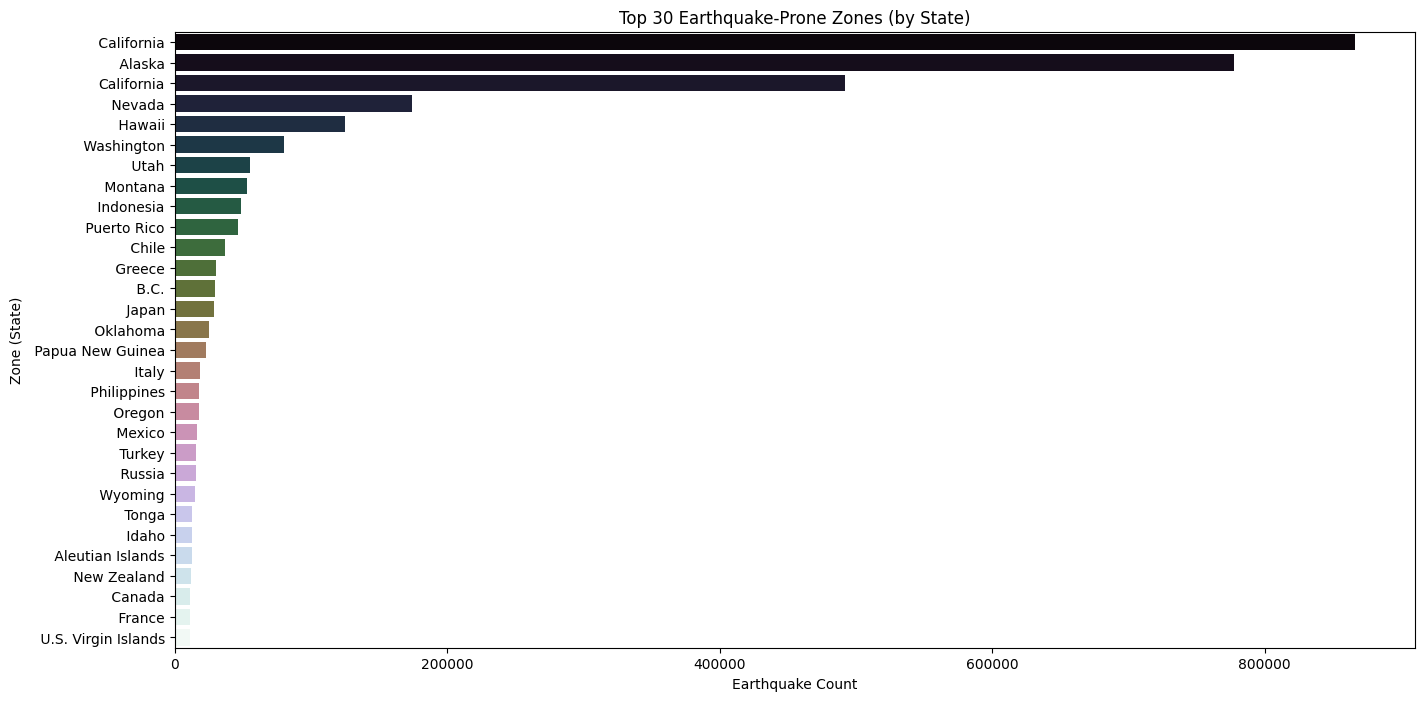

In [19]:
plt.figure(figsize=(16,8))
zone_counts = df['state'].value_counts().head(30)  # Top 30 zones
sns.barplot(x=zone_counts.values, y=zone_counts.index, palette='cubehelix')
plt.title('Top 30 Earthquake-Prone Zones (by State)')
plt.xlabel('Earthquake Count')
plt.ylabel('Zone (State)')
plt.show()


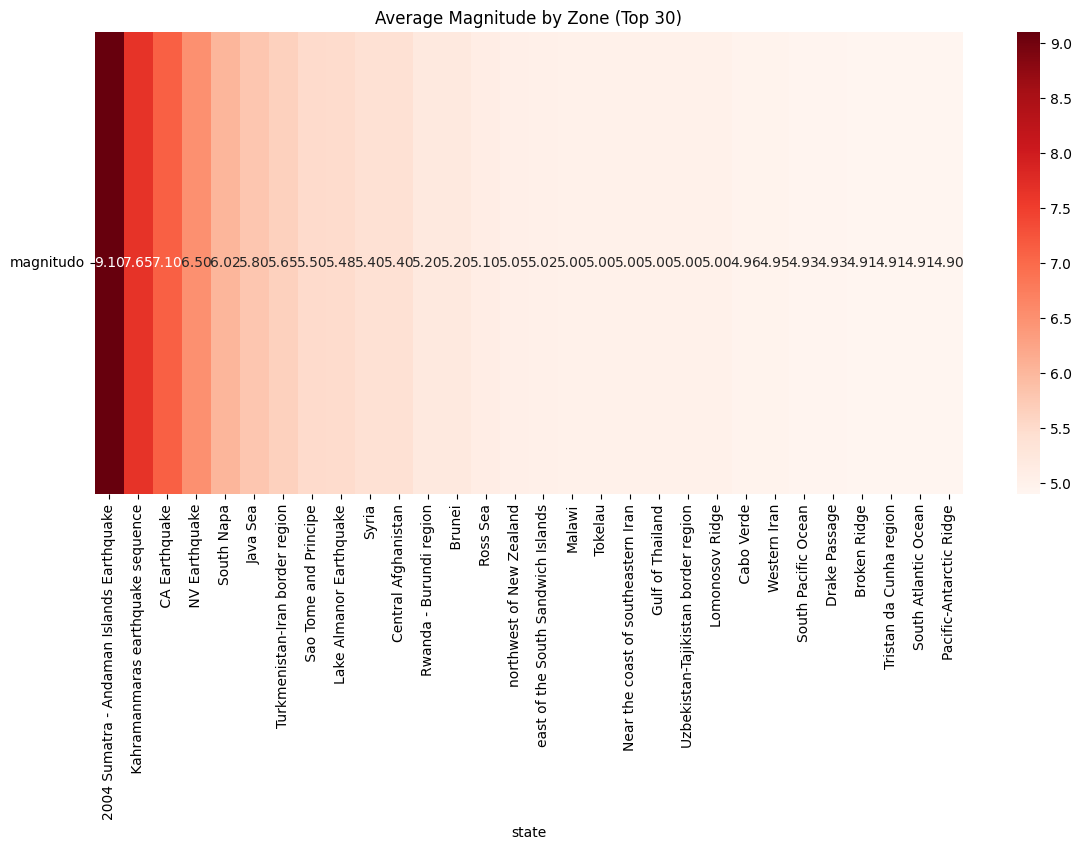

In [20]:
zone_magnitude = df.groupby('state')['magnitudo'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(14,6))
sns.heatmap(zone_magnitude.to_frame().T, cmap='Reds', annot=True, fmt='.2f')
plt.title('Average Magnitude by Zone (Top 30)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


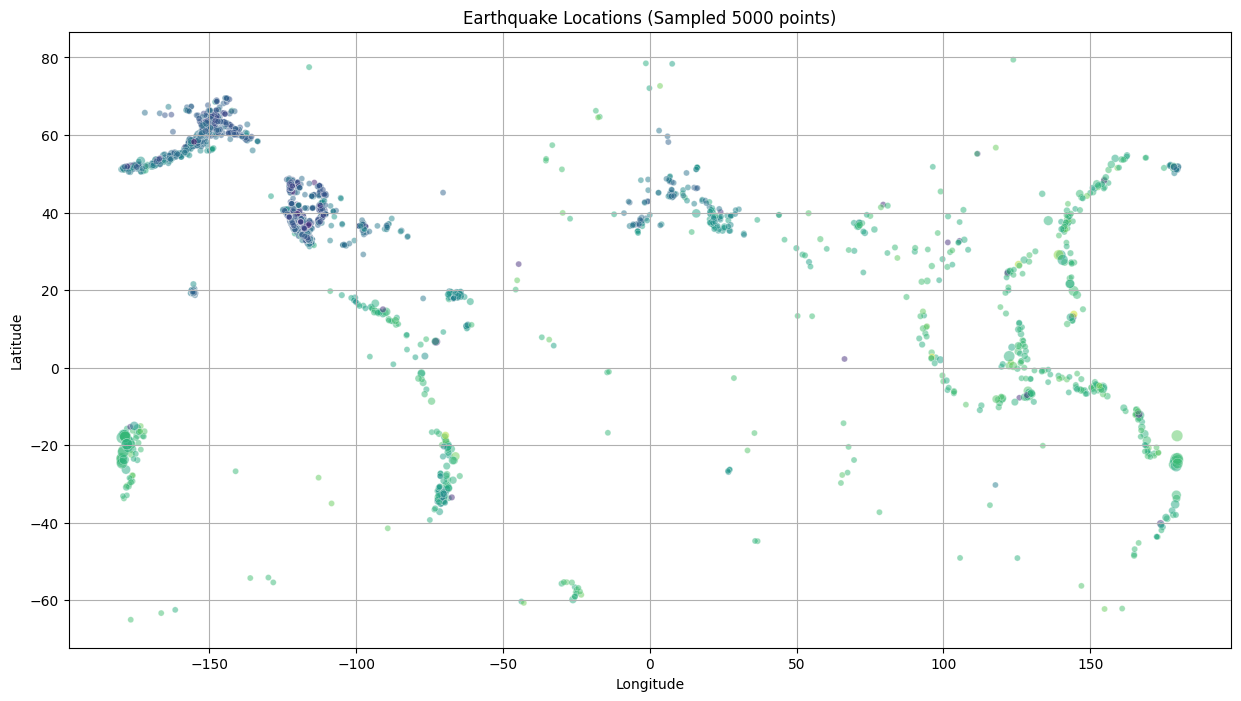

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', hue='magnitudo', size='depth',
                alpha=0.5, palette='viridis', legend=False)
plt.title('Earthquake Locations (Sampled 5000 points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [22]:
import plotly.express as px

fig = px.scatter_geo(df.sample(5000),
                     lat='latitude',
                     lon='longitude',
                     color='magnitudo',
                     size='depth',
                     title='Global Earthquake Map',
                     projection='natural earth')
fig.show()


ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [-1.866, -2.2, -1.94, -1.284, -2.36, -2.258, -1.498, -0.75, -1.937, -0.269]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [23]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import plotly.express as px

fig = px.scatter_geo(df.sample(5000),
                     lat='latitude',
                     lon='longitude',
                     color='magnitudo',
                     size='depth',
                     title='Global Earthquake Map',
                     projection='natural earth')
fig.show()


ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [-0.09, -0.81, -0.08, -1.55, -0.39, -1.268, -2.0, -1.287, -0.123, -0.78]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [25]:
df['depth_abs'] = df['depth'].abs()


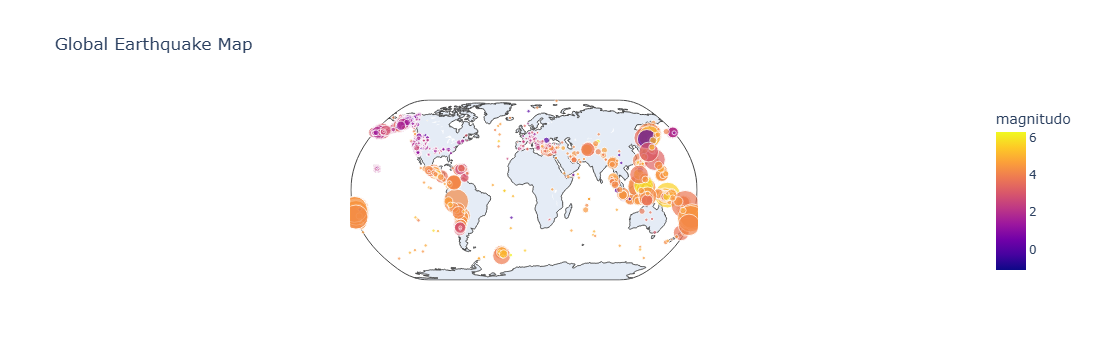

In [26]:
import plotly.express as px

fig = px.scatter_geo(df.sample(5000),
                     lat='latitude',
                     lon='longitude',
                     color='magnitudo',
                     size='depth_abs',
                     title='Global Earthquake Map',
                     projection='natural earth')
fig.show()


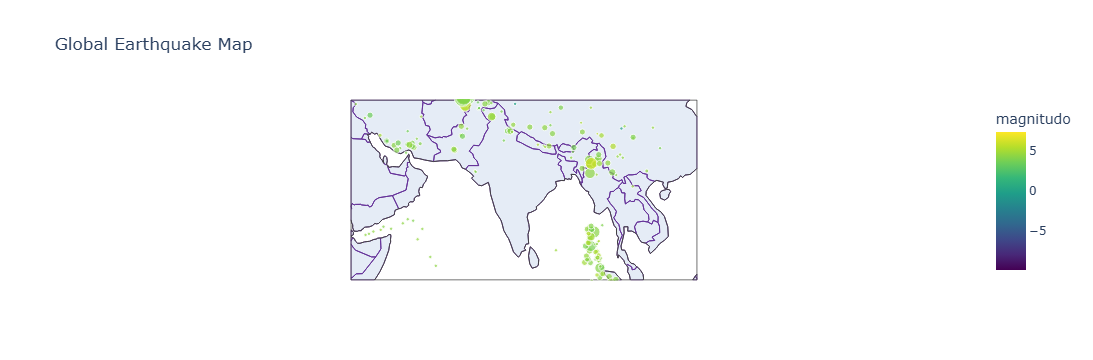

In [27]:
import plotly.express as px

# Absolute depth for size
df['depth_abs'] = df['depth'].abs()

# Sample points (increase if possible)
sample_size = 20000 if len(df) > 20000 else len(df)

fig = px.scatter_geo(df.sample(sample_size),
                     lat='latitude',
                     lon='longitude',
                     color='magnitudo',
                     size='depth_abs',
                     hover_name='date',
                     hover_data={'depth':True, 'magnitudo':True},
                     title='Global Earthquake Map',
                     projection='natural earth',
                     opacity=0.7,
                     size_max=20,
                     color_continuous_scale='Viridis')

# Zoom center (example India)
fig.update_geos(center=dict(lat=20, lon=80), projection_scale=5, showcountries=True, countrycolor="RebeccaPurple")

fig.show()


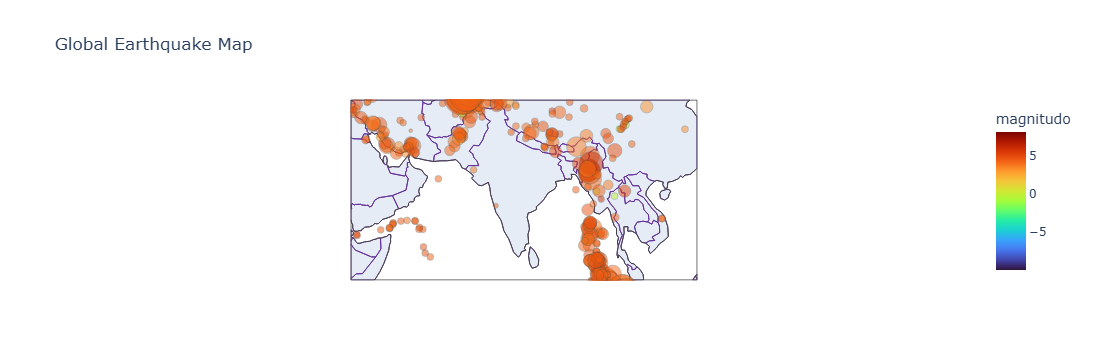

In [36]:
import plotly.express as px

df['depth_abs'] = df['depth'].abs()

sample_size = 30000 if len(df) > 30000 else len(df)

fig = px.scatter_geo(
    df.sample(sample_size),
    lat='latitude',
    lon='longitude',
    color='magnitudo',
    size='depth_abs',
    hover_name='date',
    hover_data={'depth': True, 'magnitudo': True},
    title='Global Earthquake Map',
    projection='natural earth',
    opacity=0.5,           # कम opacity ताकि overlap में भी दिखे
    size_max=40,           # point size ज़्यादा बड़ा
    color_continuous_scale='Turbo'  # रंग ज़्यादा vibrant
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))  # point border जोड़ा

# Center और Zoom (India example)
fig.update_geos(
    center=dict(lat=20, lon=80),
    projection_scale=5,
    showcountries=True,
    countrycolor="RebeccaPurple"
)

fig.show()


In [35]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic


ModuleNotFoundError: No module named 'geopy'

In [37]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement geopy (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for geopy


In [38]:
from geopy.distance import geodesic

ModuleNotFoundError: No module named 'geopy'

In [1]:
!pip install geopy



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from geopy.distance import geodesic


In [3]:
def calculate_earthquake_and_tsunami_risk(input_lat, input_lon, df, radius_km=200):
    """
    Yeh function location ke hisaab se earthquake aur tsunami ka risk predict karta hai.
    Ab ye magnitude, distance, depth, frequency, aur tsunami sab dekhkar final % nikalta hai.
    """
    from geopy.distance import geodesic
    import numpy as np

    nearby_quakes = []

    for _, row in df.iterrows():
        quake_location = (row['latitude'], row['longitude'])
        input_location = (input_lat, input_lon)
        distance = geodesic(input_location, quake_location).km

        if distance <= radius_km:
            # Distance weight
            distance_weight = 1 - (distance / radius_km)

            # Magnitude weight
            magnitude_weight = min(row['magnitudo'] / 10, 1)

            # Depth weight
            if row['depth'] <= 70:
                depth_weight = 1.0
            elif row['depth'] <= 300:
                depth_weight = 0.7
            else:
                depth_weight = 0.4

            nearby_quakes.append({
                'distance_weight': distance_weight,
                'magnitude_weight': magnitude_weight,
                'depth_weight': depth_weight,
                'tsunami': row['tsunami']
            })

    if not nearby_quakes:
        return {
            "Earthquake Risk (%)": 0.0,
            "Tsunami Risk (%)": 0.0,
            "Tsunami Likely": "No"
        }

    freq = len(nearby_quakes)
    max_freq = df.groupby(['latitude', 'longitude']).size().max()
    frequency_weight = freq / max_freq

    total_risks = [
        q['distance_weight'] * q['magnitude_weight'] * q['depth_weight'] * frequency_weight
        for q in nearby_quakes
    ]
    final_quake_risk = np.clip(np.mean(total_risks) * 100, 0, 100)

    tsunami_related = [q for q in nearby_quakes if q['tsunami'] == 1]
    if tsunami_related:
        tsunami_risk = np.clip(np.mean([
            q['distance_weight'] * q['magnitude_weight'] * q['depth_weight'] * frequency_weight * 1.5
            for q in tsunami_related
        ]) * 100, 0, 100)
    else:
        tsunami_risk = 0.0

    return {
        "Earthquake Risk (%)": round(final_quake_risk, 2),
        "Tsunami Risk (%)": round(tsunami_risk, 2),
        "Tsunami Likely": "Yes" if tsunami_risk > 20 else "No"
    }


In [4]:
def get_lat_lon_from_place(place, df):
    matching_rows = df[df['place'].str.contains(place, case=False, na=False)]
    if not matching_rows.empty:
        # Pehli match wali jagah ka lat/lon lo
        return matching_rows.iloc[0]['latitude'], matching_rows.iloc[0]['longitude']
    else:
        return None, None


In [5]:
def get_risk_for_place(place, df):
    lat, lon = get_lat_lon_from_place(place, df)

    if lat is not None and lon is not None:
        # Agar location mil gaya to seedha risk calculate karo
        return calculate_earthquake_and_tsunami_risk(lat, lon, df)
    
    else:
        print(f"No direct earthquake data found for '{place}'. Trying nearby 15 km area...")

        # Ab hum poore data me check karenge: kya koi jagah iske 15 km radius me hai?
        for _, row in df.iterrows():
            quake_location = (row['latitude'], row['longitude'])
            # Hume yaha input jagah ka lat/lon nahi mila, isliye hum 'place' me search nahi kar paaye
            # To hum har row ke place me check karenge ki kya usme yeh jagah naam aata hai
            if place.lower() in row['place'].lower():
                lat, lon = row['latitude'], row['longitude']
                return calculate_earthquake_and_tsunami_risk(lat, lon, df)
            
        # Agar 15 km ke andar bhi kuch nahi mila
        return {"earthquake_risk_percent": 0.0, "tsunami_risk_percent": 0.0}
